# Today's date - 20 June 2023
# Topic - Weight Initialization

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

from mlxtend.plotting import plot_decision_regions
import seaborn as sns

## Generating Dataset

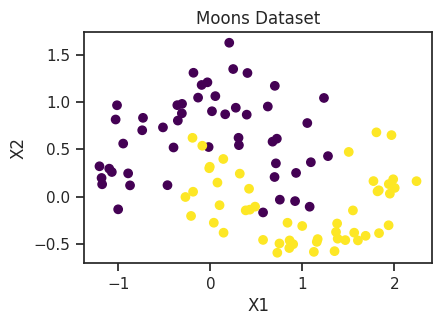

In [39]:
X, y = make_moons(n_samples=100, noise=0.23)

plt.figure(figsize=(4.5,3))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Moons Dataset')
plt.show()

### What not to do while initializing the weights ?<br>
1. Don't initialize it to 0<br>
2. Dont initialize to non-zero, constant value of all weights and bias (say 0.5)<br>
3. Random + small (less than 0.01) initialization <br>
4. Random + large (-3 to 3) initialization

# Four Types of Initialization
1. Xavier / Glorot normal
2. Xavier uniform
3. He normal
4. He uniform
We will try all the four here, on this dataset

## Xavier / glorot normal
used on tanh, sigmoid

In [40]:
model1 = Sequential()

model1.add(Dense(10,activation='tanh',input_dim=2,kernel_initializer='glorot_normal')) #glorat uniform is the default parameter in keras
model1.add(Dense(10,activation='tanh',kernel_initializer='glorot_normal'))
model1.add(Dense(10,activation='tanh',kernel_initializer='glorot_normal'))
model1.add(Dense(10,activation='tanh',kernel_initializer='glorot_normal'))
model1.add(Dense(1,activation='sigmoid'))

model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history1 = model1.fit(X,y,epochs=100,validation_split=0.2, verbose=0)

5469/5469 [==============================] - 8s 2ms/step


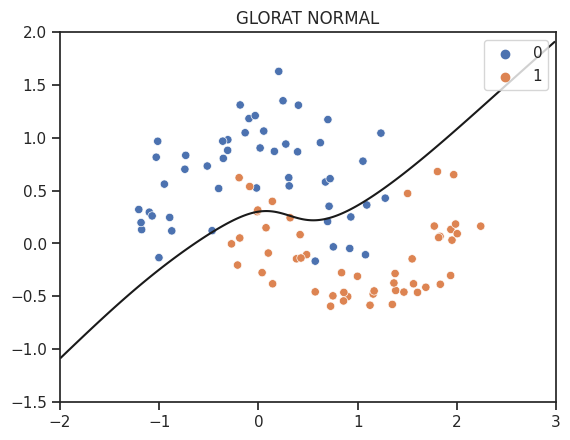

<Figure size 450x300 with 0 Axes>

In [41]:
# Plotting decision boundary
step_size = 0.01
x_min, x_max = -2, 3
y_min, y_max = -1.5, 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

# Make predictions on the grid points
Z1 = model1.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)

# Create a scatter plot using Seaborn
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

# Overlay the decision boundary using Matplotlib
plt.contour(xx, yy, Z1, colors='k', levels=[0.5])
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.title('GLORAT NORMAL')
plt.figure(figsize=(4.5, 3))
plt.show()

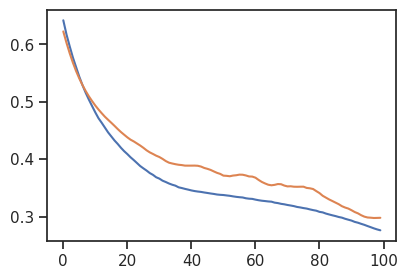

In [42]:
plt.figure(figsize=(4.5,3))
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

## Xavier / Glorot uniform (deafult parameter of keras)
used on tanh, sigmoid

In [43]:
model2 = Sequential()

model2.add(Dense(10,activation='tanh',input_dim=2,kernel_initializer='glorot_uniform')) #glorat uniform is the default parameter in keras
model2.add(Dense(10,activation='tanh',kernel_initializer='glorot_uniform'))
model2.add(Dense(10,activation='tanh',kernel_initializer='glorot_uniform'))
model2.add(Dense(10,activation='tanh',kernel_initializer='glorot_uniform'))
model2.add(Dense(1,activation='sigmoid'))

model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history2 = model2.fit(X,y,epochs=100,validation_split=0.2, verbose=0)

5469/5469 [==============================] - 7s 1ms/step


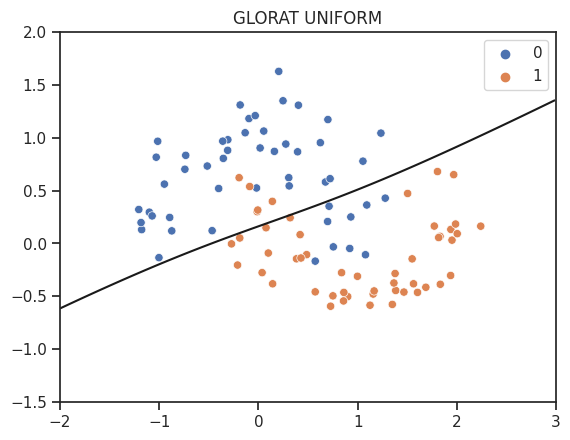

<Figure size 450x300 with 0 Axes>

In [44]:
# Plotting decision boundary
step_size = 0.01
x_min, x_max = -2, 3
y_min, y_max = -1.5, 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

# Make predictions on the grid points
Z2 = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)

# Create a scatter plot using Seaborn
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

# Overlay the decision boundary using Matplotlib
plt.contour(xx, yy, Z2, colors='k', levels=[0.5])
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.title('GLORAT UNIFORM')
plt.figure(figsize=(4.5, 3))
plt.show()

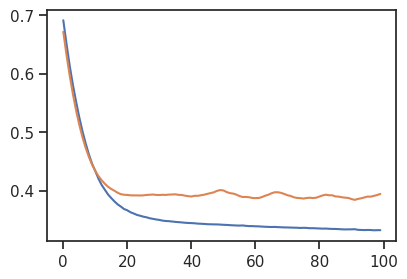

In [45]:
plt.figure(figsize=(4.5,3))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

## He normal
used on ReLU


In [46]:
model3 = Sequential()

model3.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal')) #glorat uniform is the default parameter in keras
model3.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model3.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model3.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model3.add(Dense(1,activation='sigmoid'))

model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history3 = model3.fit(X,y,epochs=100,validation_split=0.2, verbose=0)

5469/5469 [==============================] - 8s 1ms/step


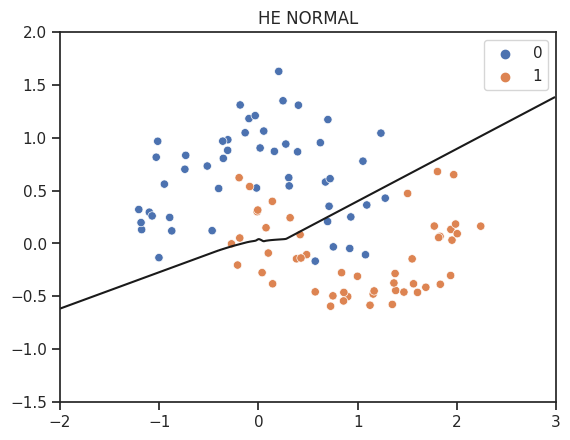

<Figure size 450x300 with 0 Axes>

In [47]:
# Plotting decision boundary
step_size = 0.01
x_min, x_max = -2, 3
y_min, y_max = -1.5, 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

# Make predictions on the grid points
Z3 = model3.predict(np.c_[xx.ravel(), yy.ravel()])
Z3 = Z3.reshape(xx.shape)

# Create a scatter plot using Seaborn
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

# Overlay the decision boundary using Matplotlib
plt.contour(xx, yy, Z3, colors='k', levels=[0.5])
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.title('HE NORMAL')
plt.figure(figsize=(4.5, 3))
plt.show()

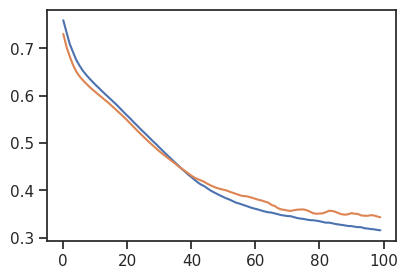

In [48]:
plt.figure(figsize=(4.5,3))
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])

## He uniform
used on ReLU

In [49]:
model4 = Sequential()

model4.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_uniform')) #glorat uniform is the default parameter in keras
model4.add(Dense(10,activation='relu',kernel_initializer='he_uniform'))
model4.add(Dense(10,activation='relu',kernel_initializer='he_uniform'))
model4.add(Dense(10,activation='relu',kernel_initializer='he_uniform'))
model4.add(Dense(1,activation='sigmoid'))

model4.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history4 = model4.fit(X,y,epochs=100,validation_split=0.2, verbose=0)

5469/5469 [==============================] - 7s 1ms/step


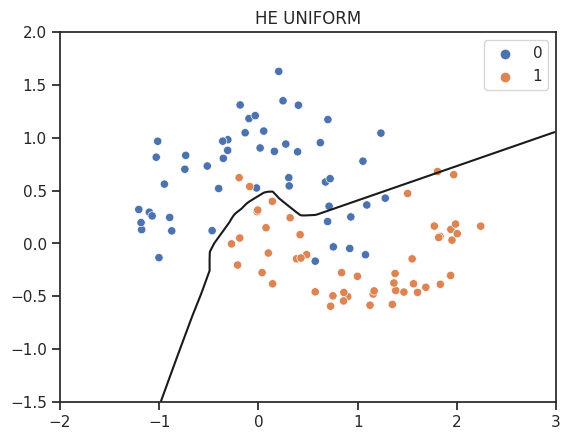

<Figure size 450x300 with 0 Axes>

In [50]:
# Plotting decision boundary
step_size = 0.01
x_min, x_max = -2, 3
y_min, y_max = -1.5, 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

# Make predictions on the grid points
Z4 = model4.predict(np.c_[xx.ravel(), yy.ravel()])
Z4 = Z4.reshape(xx.shape)

# Create a scatter plot using Seaborn
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

# Overlay the decision boundary using Matplotlib
plt.contour(xx, yy, Z4, colors='k', levels=[0.5])
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.title('HE UNIFORM')
plt.figure(figsize=(4.5, 3))
plt.show()

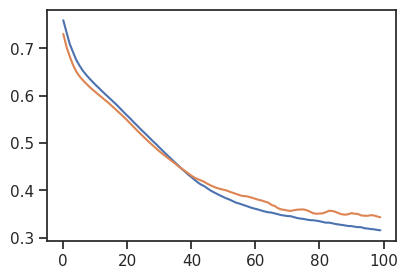

In [51]:
plt.figure(figsize=(4.5,3))
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])